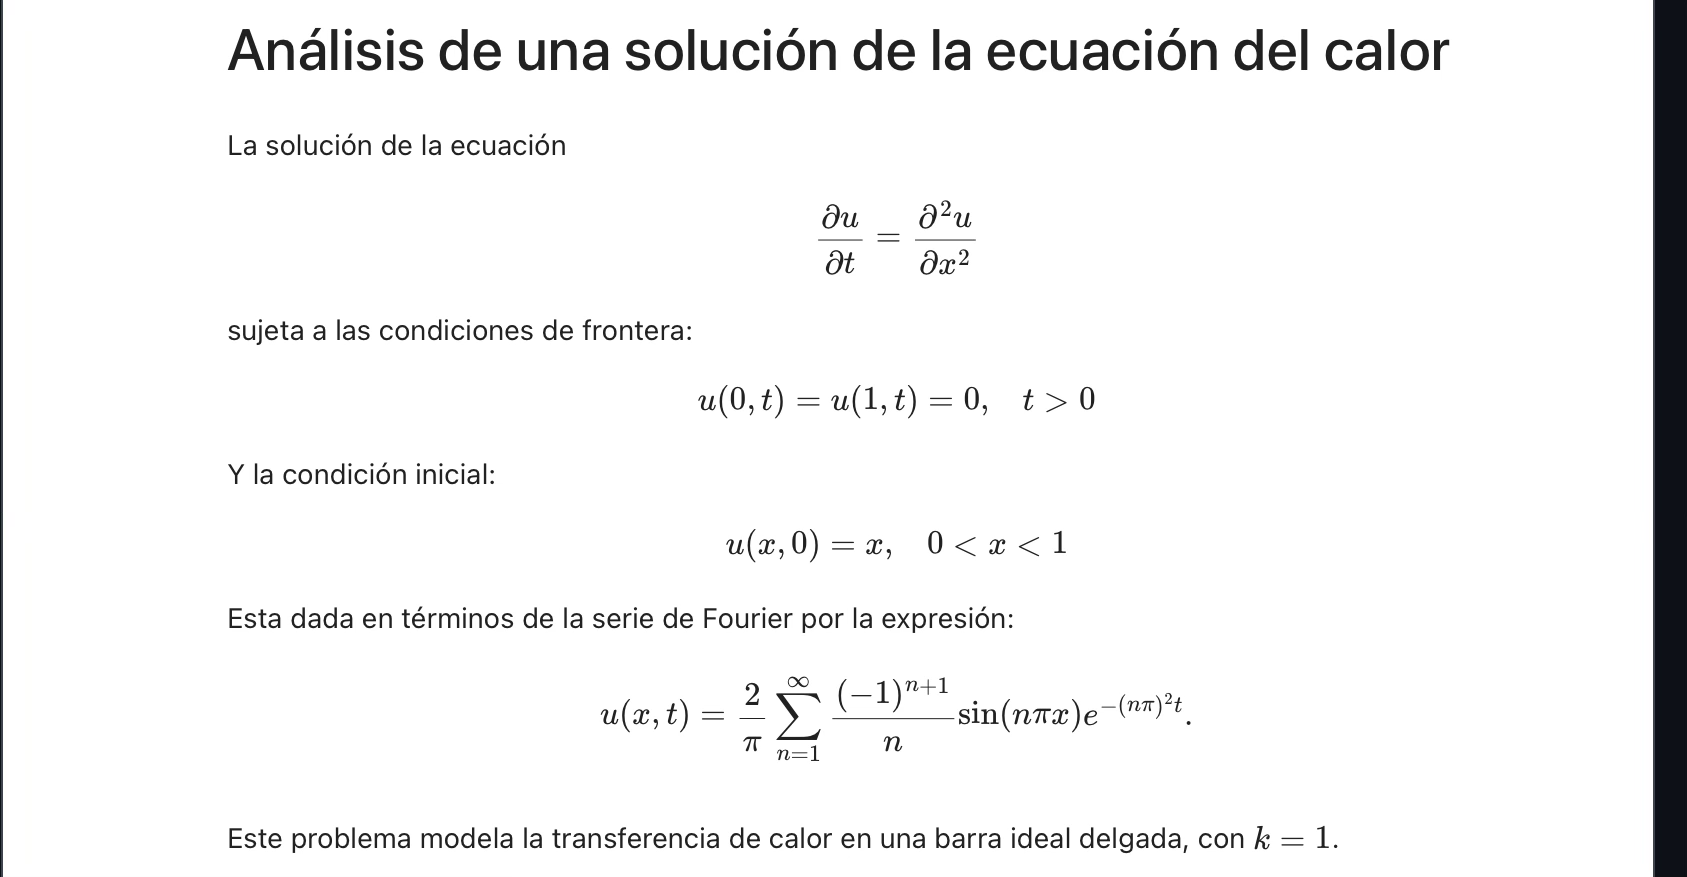

In [1]:
from pylab import *

In [2]:
# Definimos la función que describe la condición inicial (una recta)
def recta(x):
    # Creamos un arreglo de ceros del mismo tamaño que x
    y = zeros(len(x))
    # Asignamos a cada posición de y el valor correspondiente de x para formar la recta y=x
    for i in range(len(x)):
        y[i] = x[i]
    return y


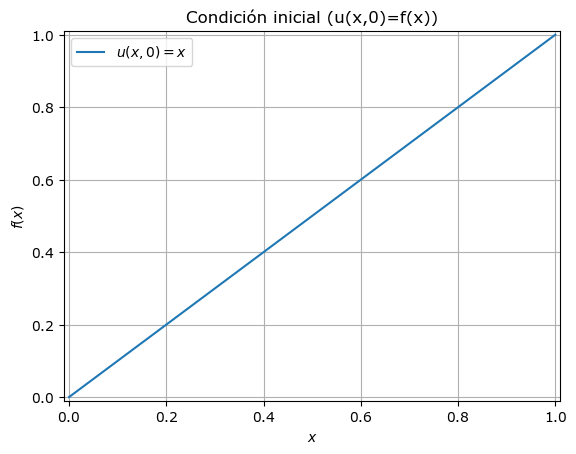

In [3]:
# Generamos una serie de 1000 puntos igualmente espaciados entre 0 y 1 para graficar
x = linspace(0,1,1000)
# Evaluamos la función recta en x
f = recta(x)
# Graficamos la condición inicial u(x,0)=x
plot(x, f, label='$u(x,0)=x$')
plt.xlabel('$x$')  # Etiqueta del eje x
plt.ylabel('$f(x)$')  # Etiqueta del eje y
plt.title("Condición inicial (u(x,0)=f(x))")  # Título de la gráfica
# Ajustamos los límites de los ejes y agregamos una cuadrícula y una leyenda
xlim([-0.01,1.01]), ylim([-0.01,1.01]), grid(), legend()
# Mostramos la gráfica
show()


In [4]:
# Definimos la función que calcula la serie de Fourier para aproximar la condición inicial
def u_0(x, N=20):  # N es el número de armónicos
    f = zeros(len(x))  # Iniciamos un arreglo de ceros del tamaño de x
    # Iteramos sobre los armónicos para sumar cada término de la serie de Fourier
    for n in range(1, N):
        f += (-1)**(n+1) * sin(n * pi * x) / n
    return (2.0 / pi) * f  # Multiplicamos por 2/pi para ajustar la serie de Fourier


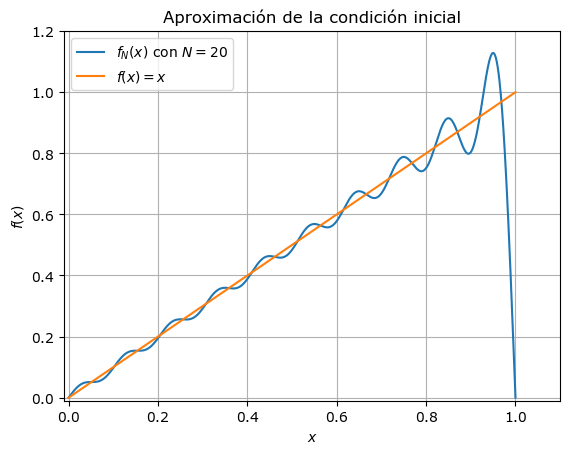

In [5]:
# Calculamos la aproximación con N=20 armónicos
f_n = u_0(x)
# Graficamos la serie de Fourier aproximada y la condición inicial original
plot(x, f_n, label='$f_N(x)$ con $N=20$')
plot(x, f, label='$f(x)=x$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$')
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]), ylim([-0.01,1.2]), grid(), legend()
show()


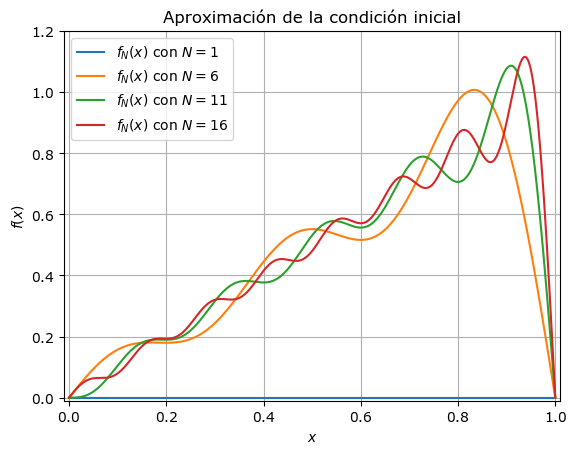

In [6]:
# Graficamos la aproximación para diferentes números de armónicos para ver la convergencia
for i in range(1, 20, 5):  # Iteramos de 1 a 20 en pasos de 5
    plot(x, u_0(x, i), label='$f_N(x)$ con $N=%d$' % i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$')
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]), ylim([-0.01,1.2]), grid(), legend()
show()


In [7]:
# Definimos la función que calcula la solución general u(x,t) de la ecuación diferencial
def u_x_t(x, t, N=50):
    # Creamos un arreglo de ceros con dimensiones (len(x), len(t)) para almacenar la solución
    f = zeros((len(x), len(t)))
    # Iteramos sobre cada valor de tiempo t
    for i in range(len(t)):
        # Sumamos los términos de la serie de Fourier con su respectiva dependencia temporal
        for n in range(1, N):
            f[:, i] += (-1)**(n+1) * sin(n * pi * x) / n * exp(-n**2 * pi**2 * t[i])
    return (2.0 / pi) * f  # Multiplicamos por 2/pi para ajustar la serie de Fourier


In [8]:
# Definimos el dominio espacial y temporal para la solución
x = linspace(0, 1, 1000)  # 1000 puntos en el espacio
t = linspace(0, 10, 1000)  # 1000 puntos en el tiempo
# Calculamos la solución u(x,t) en el dominio definido
U = u_x_t(x, t)


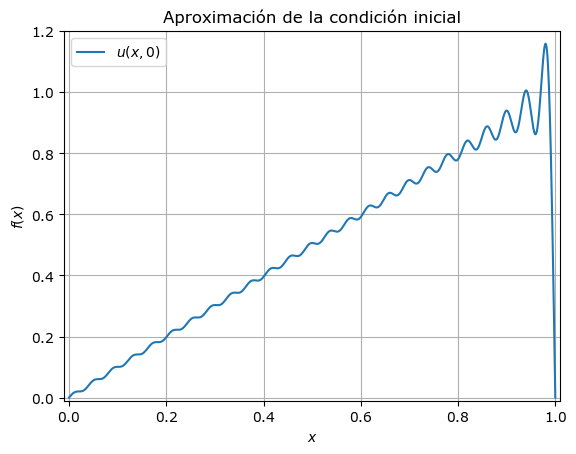

In [9]:
# Graficamos la solución en t=0
plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,1.2]),grid(),legend()
show()

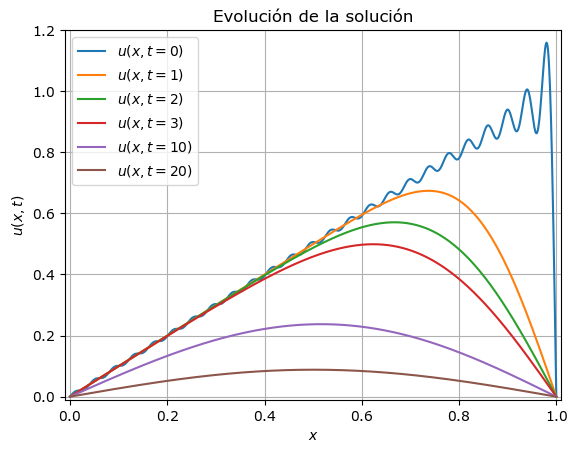

In [10]:
# Graficamos la solución para diferentes tiempos para ver la evolución de la solución
plot(x, U[:, 0], label='$u(x,t=0)$')  # Solución en t=0
plot(x, U[:, 1], label='$u(x,t=1)$')  # Solución en t=1
plot(x, U[:, 2], label='$u(x,t=2)$')  # Solución en t=2
plot(x, U[:, 3], label='$u(x,t=3)$')  # Solución en t=3
plot(x, U[:, 10], label='$u(x,t=10)$')  # Solución en t=10
plot(x, U[:, 20], label='$u(x,t=20)$')  # Solución en t=20
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$')
plt.title("Evolución de la solución")
xlim([-0.01,1.01]), ylim([-0.01,1.2]), grid(), legend()
show()


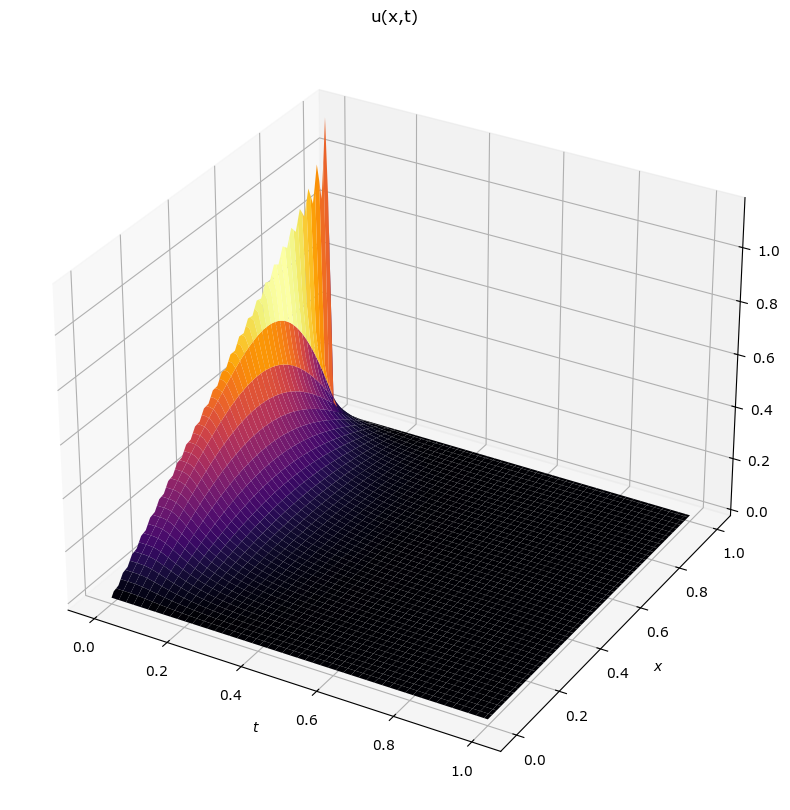

In [11]:
# Graficamos la solución completa en 3D para visualizar u(x,t)
#%matplotlib notebook  # Usar si se desea interactividad en la gráfica 3D
from mpl_toolkits.mplot3d import Axes3D

# Creamos una figura y un subplot 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection="3d")

# Redefinimos los dominios de x y t para la gráfica 3D
x = linspace(0, 1.0, 100)
t = linspace(0, 1.0, 100)

# Creamos una malla para X y T
X, T = np.meshgrid(x, t)

# Calculamos la solución u(x,t) para la malla
U = u_x_t(x, t)

# Etiquetas y título de la gráfica 3D
plt.xlabel('$t$'); plt.ylabel('$x$')
plt.title("u(x,t)")

# Graficamos la superficie con un mapa de color "inferno"
ax.plot_surface(X, T, U, cmap="inferno")  # Otros colores disponibles: "viridis", "inferno", "plasma"

Resumen del código

	1. Importaciones y definición de la condición inicial: Se define una función recta(x) que representa la condición inicial  u(x,0) = x  y se grafica.
	2. Aproximación con series de Fourier: Se define la función u_0(x, N) que calcula una aproximación de la condición inicial usando una serie de Fourier truncada en  N  armónicos. Se grafica esta aproximación para ver cómo converge a la función original.
	3. Solución general  u(x,t) : La función u_x_t(x, t, N) calcula la solución de la ecuación de calor en función del tiempo usando la serie de Fourier y el decaimiento exponencial asociado a cada término.
	4. Visualización de la solución: Se grafican la solución para distintos tiempos  t  y se realiza una visualización 3D para observar cómo la solución evoluciona en el espacio  (x,t) .

Este código es útil para entender cómo se comporta la solución de una ecuación diferencial parcial usando series de Fourier y observar su evolución en el tiempo.

Ejercicio 2 de la actividad 4

$f(x)=\sin(2\pi x)-3\sin(6\pi x)$

In [12]:

# Definimos la nueva condición inicial
def nueva_funcion(x):
    return np.sin(2 * np.pi * x) - 3 * np.sin(6 * np.pi * x)


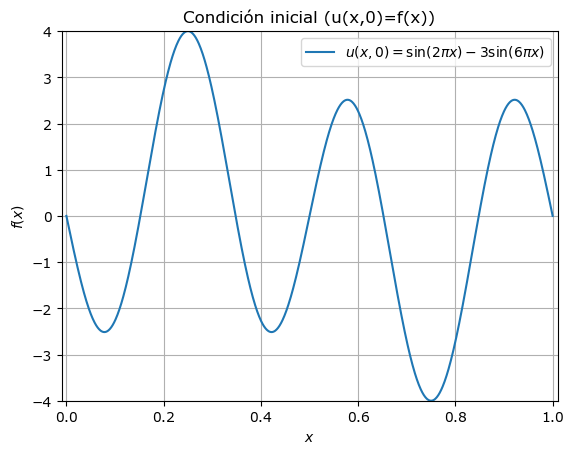

In [13]:
# Graficamos la nueva condición inicial.
x = linspace(0, 1, 1000)
f = nueva_funcion(x)
plot(x, f, label='$u(x,0)=\sin(2\pi x) - 3\sin(6\pi x)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title("Condición inicial (u(x,0)=f(x))")
xlim([-0.01, 1.01])
ylim([-4, 4])
grid()
legend()
show()

In [14]:
# Usamos una serie de Fourier para aproximar la nueva condición inicial.
def u_0(x, N=20):  # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1, N):
        f += (-1)**(n+1) * sin(n * pi * x) / n
    return (2.0 / pi) * f



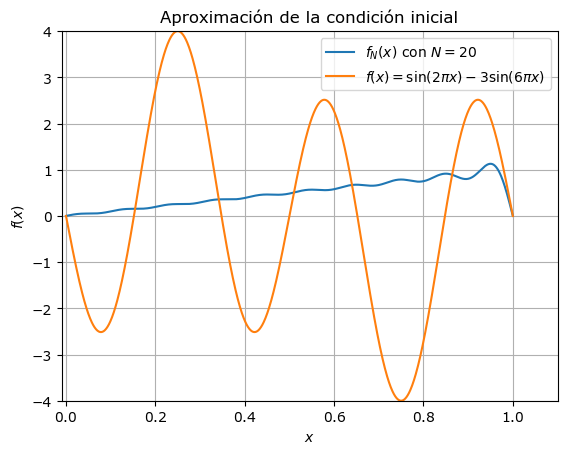

In [15]:
# Aproximación de la nueva condición inicial
f_n = u_0(x)
plot(x, f_n, label='$f_N(x)$ con $N=20$')
plot(x, f, label='$f(x)=\sin(2\pi x) - 3\sin(6\pi x)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title("Aproximación de la condición inicial")
xlim([-0.01, 1.1])
ylim([-4, 4])
grid()
legend()
show()

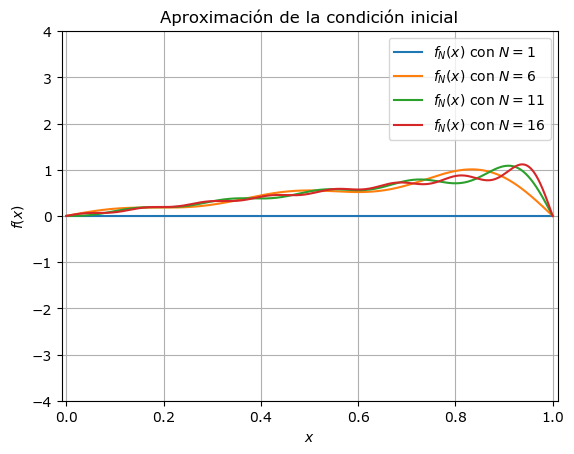

In [16]:
# Visualizamos la aproximación para diferentes cantidades de armónicos.
for i in range(1, 20, 5):
    plot(x, u_0(x, i), label='$f_N(x)$ con $N=%d$' % i)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title("Aproximación de la condición inicial")
xlim([-0.01, 1.01])
ylim([-4, 4])
grid()
legend()
show()

In [17]:
# Agregamos la parte temporal para visualizar la solución completa.
def u_x_t(x, t, N=50):
    f = zeros((len(x), len(t)))
    for i in range(len(t)):
        for n in range(1, N):
            f[:, i] += (-1)**(n+1) * sin(n * pi * x) / n * exp(-n**2 * pi**2 * t[i])
    return (2.0 / pi) * f

In [18]:
# Solución para diferentes tiempos
x = linspace(0, 1, 1000)
t = linspace(0, 10, 1000)
U = u_x_t(x, t)

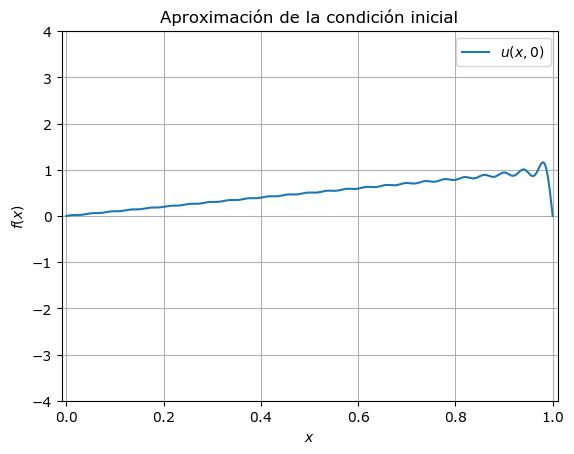

In [19]:
# Graficamos la solución para el tiempo inicial, t=0.
plot(x, U[:, 0], label='$u(x,0)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title("Aproximación de la condición inicial")
xlim([-0.01, 1.01])
ylim([-4, 4])
grid()
legend()
show()

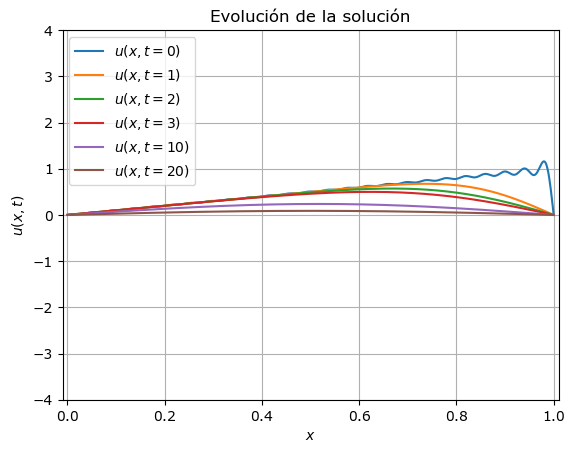

In [20]:
# Evolución de la solución para diferentes tiempos.
plot(x, U[:, 0], label='$u(x,t=0)$')
plot(x, U[:, 1], label='$u(x,t=1)$')
plot(x, U[:, 2], label='$u(x,t=2)$')
plot(x, U[:, 3], label='$u(x,t=3)$')
plot(x, U[:, 10], label='$u(x,t=10)$')
plot(x, U[:, 20], label='$u(x,t=20)$')
plt.xlabel('$x$')
plt.ylabel('$u(x,t)$')
plt.title("Evolución de la solución")
xlim([-0.01, 1.01])
ylim([-4, 4])
grid()
legend()
show()

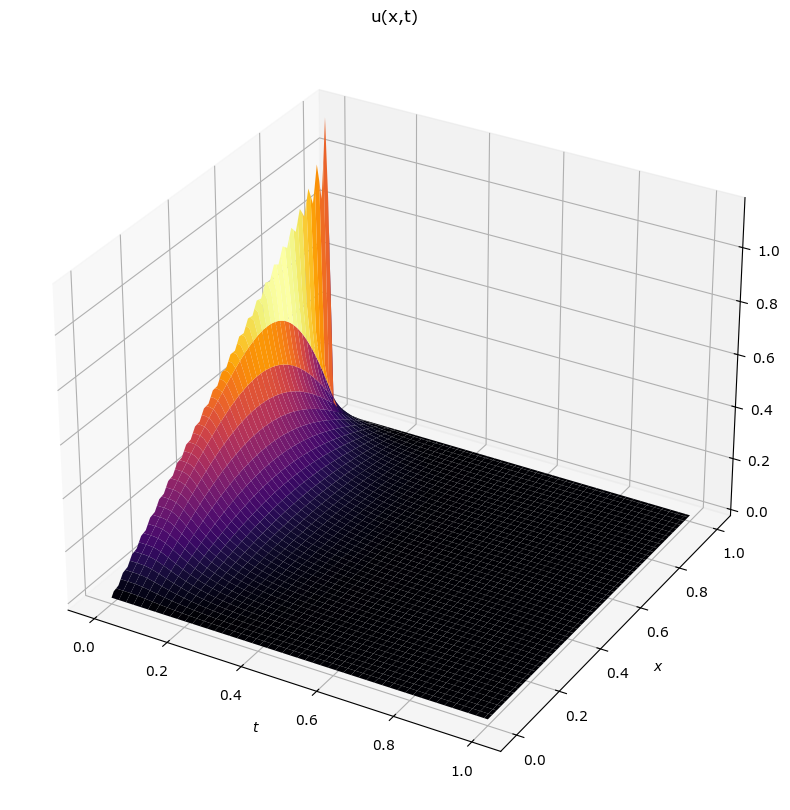

In [21]:
# Gráfica 3D de la evolución de la solución.
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0, 1.0, 100)
t = linspace(0, 1.0, 100)

X, T = np.meshgrid(x, t)
U = u_x_t(x, t)

plt.xlabel('$t$')
plt.ylabel('$x$')
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="inferno")

$f(x)=-2$

In [22]:
# Definimos la nueva condición inicial constante.
def nueva_funcion(x):
    return -2 * np.ones_like(x)


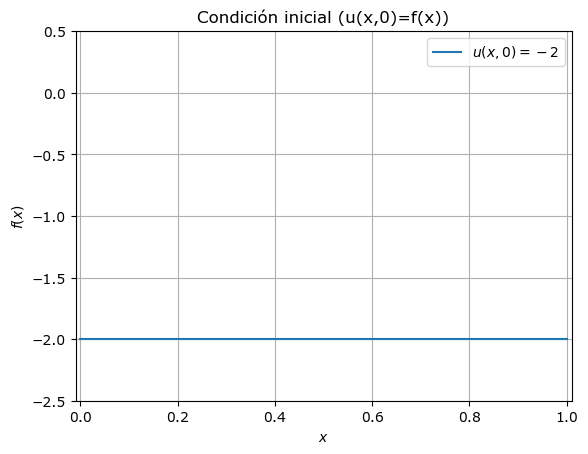

In [23]:
# Graficamos la nueva condición inicial.
x = linspace(0, 1, 1000)
f = nueva_funcion(x)
plot(x, f, label='$u(x,0)=-2$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title("Condición inicial (u(x,0)=f(x))")
xlim([-0.01, 1.01])
ylim([-2.5, 0.5])
grid()
legend()
show()


In [24]:
# Usamos una serie de Fourier para aproximar la nueva condición inicial.
def u_0(x, N=20):  # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1, N):
        f += (-4 * (-1)**(n) / (n * pi)) * sin(n * pi * x)
    return f


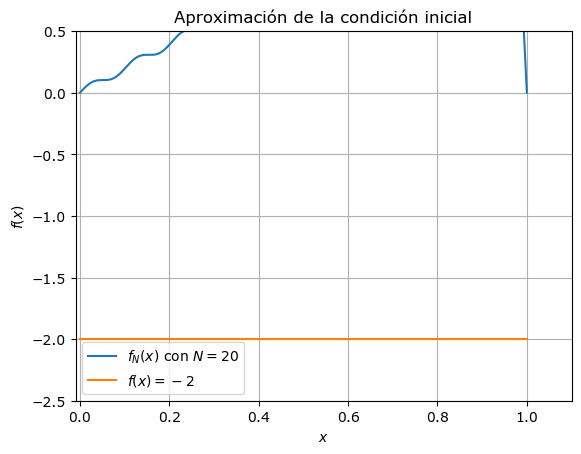

In [25]:
# Aproximación de la nueva condición inicial
f_n = u_0(x)
plot(x, f_n, label='$f_N(x)$ con $N=20$')
plot(x, f, label='$f(x)=-2$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title("Aproximación de la condición inicial")
xlim([-0.01, 1.1])
ylim([-2.5, 0.5])
grid()
legend()
show()


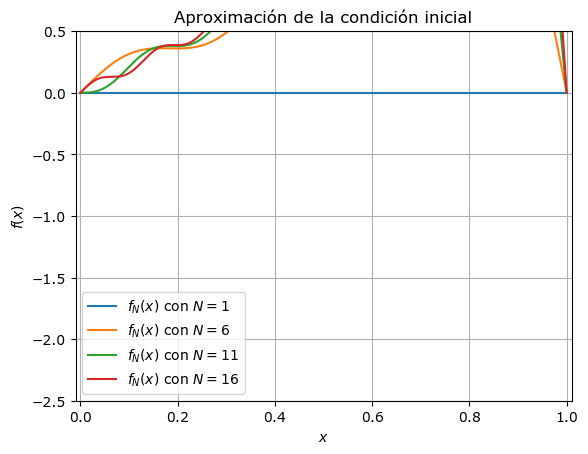

In [26]:
# Visualizamos la aproximación para diferentes cantidades de armónicos.
for i in range(1, 20, 5):
    plot(x, u_0(x, i), label='$f_N(x)$ con $N=%d$' % i)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title("Aproximación de la condición inicial")
xlim([-0.01, 1.01])
ylim([-2.5, 0.5])
grid()
legend()
show()


In [27]:
# Agregamos la parte temporal para visualizar la solución completa.
def u_x_t(x, t, N=50):
    f = zeros((len(x), len(t)))
    for i in range(len(t)):
        for n in range(1, N):
            f[:, i] += (-4 * (-1)**(n) / (n * pi)) * sin(n * pi * x) * exp(-n**2 * pi**2 * t[i])
    return f


In [28]:
# Solución para diferentes tiempos
x = linspace(0, 1, 1000)
t = linspace(0, 10, 1000)
U = u_x_t(x, t)


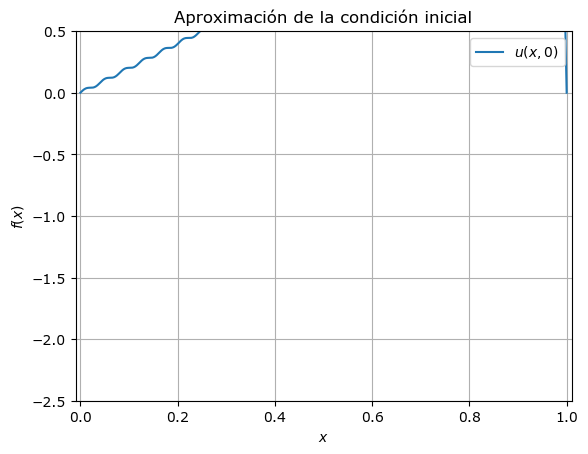

In [29]:
# Graficamos la solución para el tiempo inicial, t=0.
plot(x, U[:, 0], label='$u(x,0)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title("Aproximación de la condición inicial")
xlim([-0.01, 1.01])
ylim([-2.5, 0.5])
grid()
legend()
show()


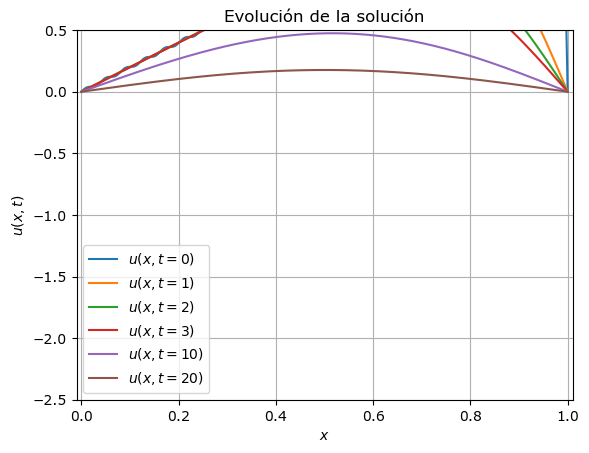

In [30]:
# Evolución de la solución para diferentes tiempos.
plot(x, U[:, 0], label='$u(x,t=0)$')
plot(x, U[:, 1], label='$u(x,t=1)$')
plot(x, U[:, 2], label='$u(x,t=2)$')
plot(x, U[:, 3], label='$u(x,t=3)$')
plot(x, U[:, 10], label='$u(x,t=10)$')
plot(x, U[:, 20], label='$u(x,t=20)$')
plt.xlabel('$x$')
plt.ylabel('$u(x,t)$')
plt.title("Evolución de la solución")
xlim([-0.01, 1.01])
ylim([-2.5, 0.5])
grid()
legend()
show()


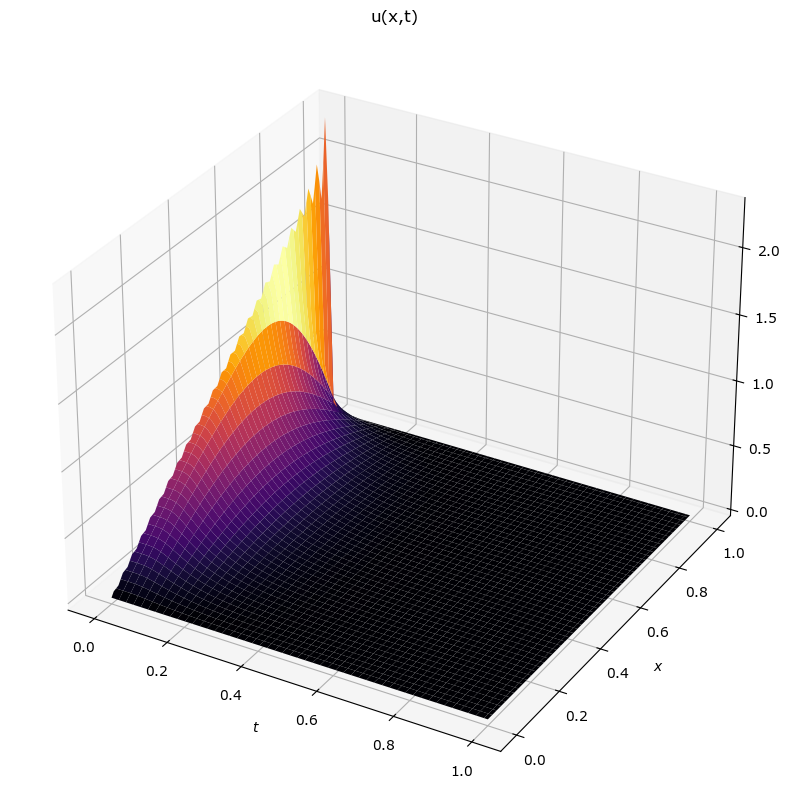

In [31]:
# Gráfica 3D de la evolución de la solución.
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0, 1.0, 100)
t = linspace(0, 1.0, 100)

X, T = np.meshgrid(x, t)
U = u_x_t(x, t)

plt.xlabel('$t$')
plt.ylabel('$x$')
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="inferno")

$f(x)=2x+1$

In [32]:
# Definimos la nueva condición inicial.
def nueva_funcion(x):
    return 2 * x + 1


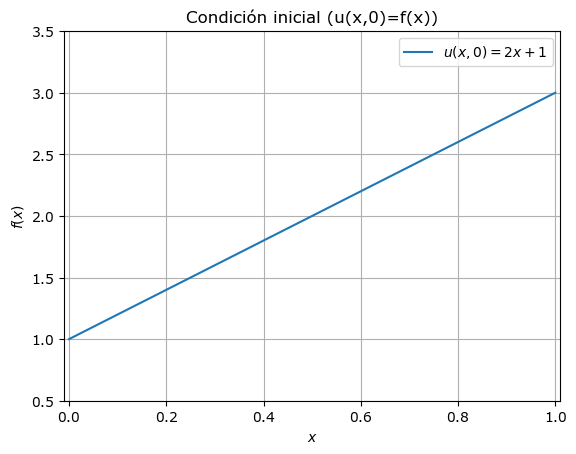

In [33]:
# Graficamos la nueva condición inicial.
x = linspace(0, 1, 1000)
f = nueva_funcion(x)
plot(x, f, label='$u(x,0)=2x+1$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title("Condición inicial (u(x,0)=f(x))")
xlim([-0.01, 1.01])
ylim([0.5, 3.5])
grid()
legend()
show()


In [34]:
# Usamos una serie de Fourier para aproximar la nueva condición inicial.
def u_0(x, N=20):  # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1, N):
        coef = (4 * (-1)**(n+1) / (n * pi))
        f += coef * sin(n * pi * x)
    return f + 1  # +1 para ajustar la serie a la constante en la condición inicial


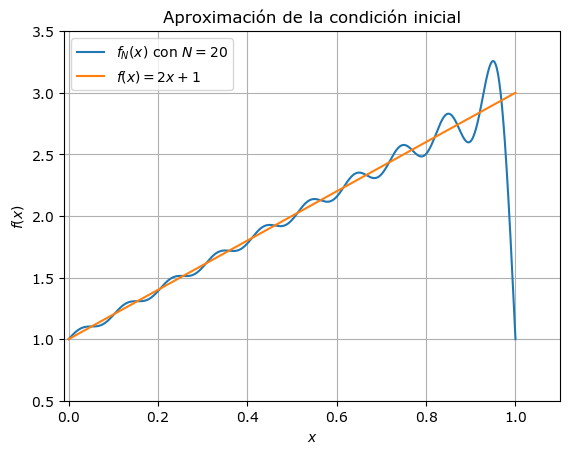

In [35]:
# Aproximación de la nueva condición inicial
f_n = u_0(x)
plot(x, f_n, label='$f_N(x)$ con $N=20$')
plot(x, f, label='$f(x)=2x+1$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title("Aproximación de la condición inicial")
xlim([-0.01, 1.1])
ylim([0.5, 3.5])
grid()
legend()
show()


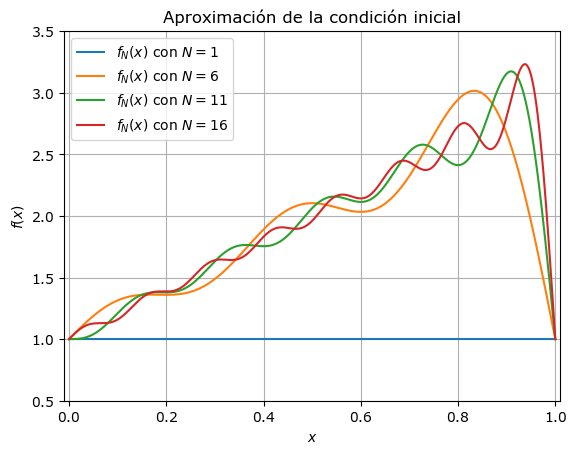

In [36]:
# Visualizamos la aproximación para diferentes cantidades de armónicos.
for i in range(1, 20, 5):
    plot(x, u_0(x, i), label='$f_N(x)$ con $N=%d$' % i)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title("Aproximación de la condición inicial")
xlim([-0.01, 1.01])
ylim([0.5, 3.5])
grid()
legend()
show()


In [37]:
# Agregamos la parte temporal para visualizar la solución completa.
def u_x_t(x, t, N=50):
    f = zeros((len(x), len(t)))
    for i in range(len(t)):
        for n in range(1, N):
            coef = (4 * (-1)**(n+1) / (n * pi))
            f[:, i] += coef * sin(n * pi * x) * exp(-n**2 * pi**2 * t[i])
    return f + 1  # +1 para ajustar la serie a la constante en la condición inicial


In [38]:
# Solución para diferentes tiempos
x = linspace(0, 1, 1000)
t = linspace(0, 10, 1000)
U = u_x_t(x, t)


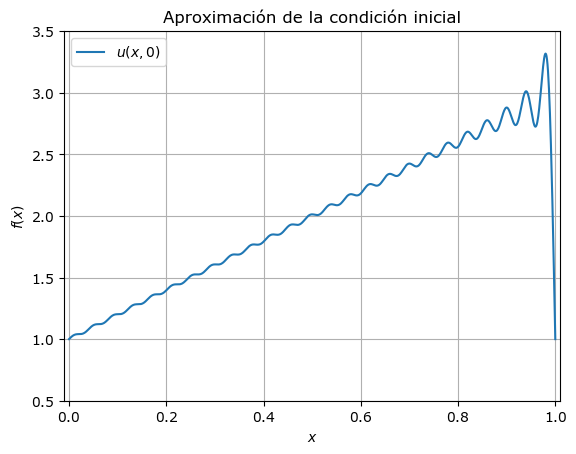

In [39]:
# Graficamos la solución para el tiempo inicial, t=0.
plot(x, U[:, 0], label='$u(x,0)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title("Aproximación de la condición inicial")
xlim([-0.01, 1.01])
ylim([0.5, 3.5])
grid()
legend()
show()


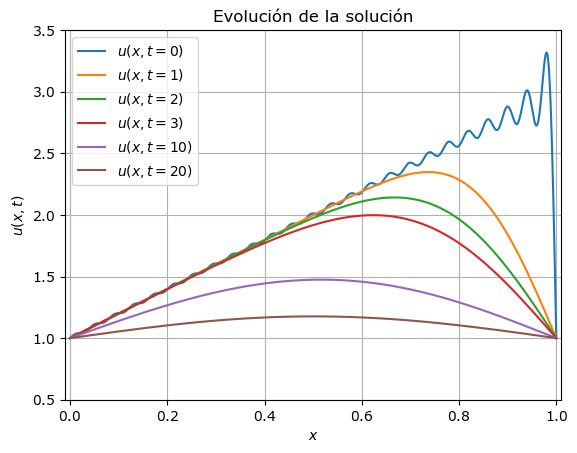

In [40]:
# Evolución de la solución para diferentes tiempos.
plot(x, U[:, 0], label='$u(x,t=0)$')
plot(x, U[:, 1], label='$u(x,t=1)$')
plot(x, U[:, 2], label='$u(x,t=2)$')
plot(x, U[:, 3], label='$u(x,t=3)$')
plot(x, U[:, 10], label='$u(x,t=10)$')
plot(x, U[:, 20], label='$u(x,t=20)$')
plt.xlabel('$x$')
plt.ylabel('$u(x,t)$')
plt.title("Evolución de la solución")
xlim([-0.01, 1.01])
ylim([0.5, 3.5])
grid()
legend()
show()


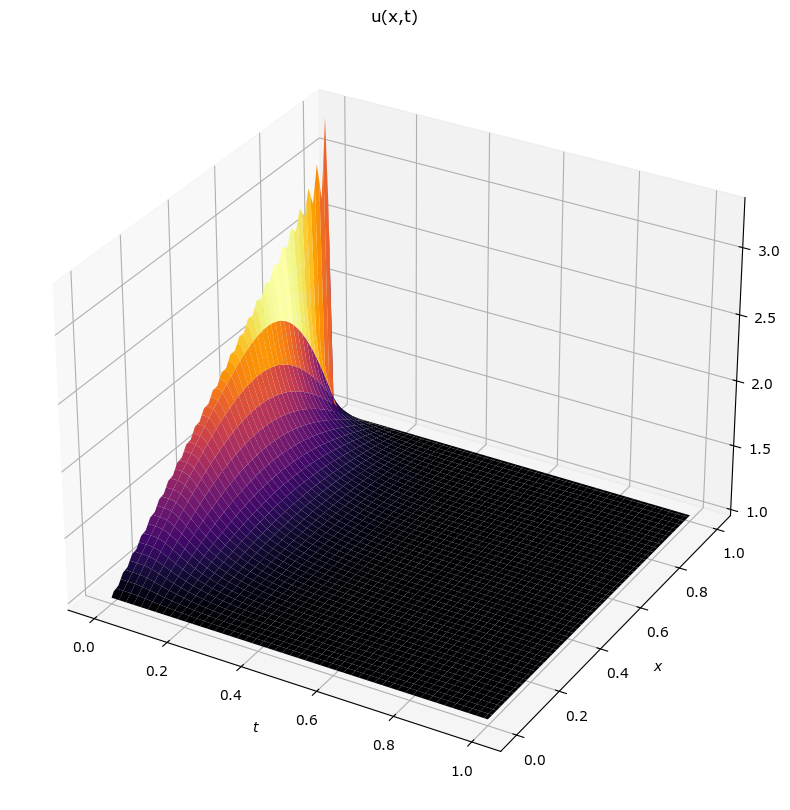

In [41]:
# Gráfica 3D de la evolución de la solución.
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0, 1.0, 100)
t = linspace(0, 1.0, 100)

X, T = np.meshgrid(x, t)
U = u_x_t(x, t)

plt.xlabel('$t$')
plt.ylabel('$x$')
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="inferno")

$f(x)=\begin{cases}
x, \quad 0<x<=\frac{1}{2} \\
0, \quad \frac{1}{2}<x<1
\end{cases}$



In [42]:
# Definimos la nueva condición inicial a trozos.
def nueva_funcion(x):
    y = np.zeros_like(x)
    for i in range(len(x)):
        if 0 < x[i] <= 0.5:
            y[i] = x[i]
        else:
            y[i] = 0
    return y


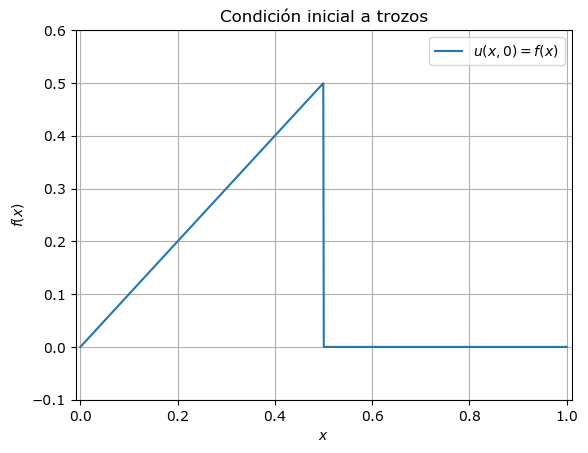

In [43]:
# Graficamos la nueva condición inicial.
x = linspace(0, 1, 1000)
f = nueva_funcion(x)
plot(x, f, label='$u(x,0)=f(x)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title("Condición inicial a trozos")
xlim([-0.01, 1.01])
ylim([-0.1, 0.6])
grid()
legend()
show()


In [44]:
# Usamos una serie de Fourier para aproximar la nueva condición inicial.
def u_0(x, N=20):  # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1, N):
        coef = (2 * (1 - (-1)**n) / (n**2 * pi**2))
        f += coef * sin(n * pi * x)
    return f


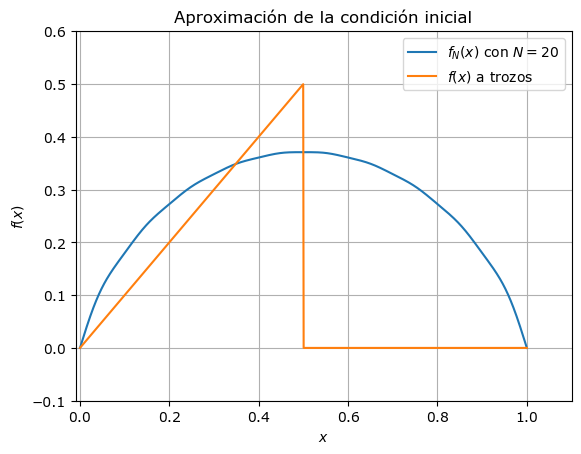

In [45]:
# Aproximación de la nueva condición inicial
f_n = u_0(x)
plot(x, f_n, label='$f_N(x)$ con $N=20$')
plot(x, f, label='$f(x)$ a trozos')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title("Aproximación de la condición inicial")
xlim([-0.01, 1.1])
ylim([-0.1, 0.6])
grid()
legend()
show()


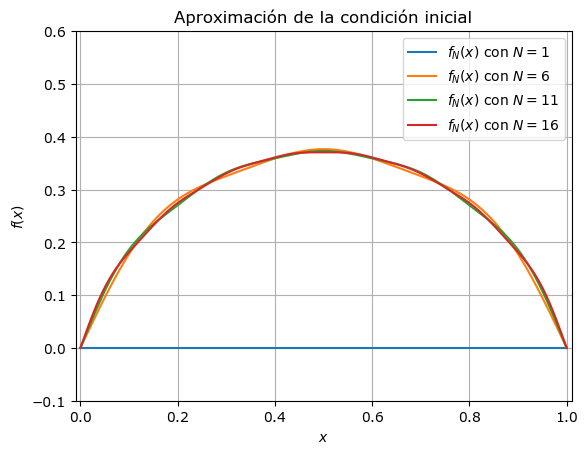

In [46]:
# Visualizamos la aproximación para diferentes cantidades de armónicos.
for i in range(1, 20, 5):
    plot(x, u_0(x, i), label='$f_N(x)$ con $N=%d$' % i)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title("Aproximación de la condición inicial")
xlim([-0.01, 1.01])
ylim([-0.1, 0.6])
grid()
legend()
show()


In [47]:
# Agregamos la parte temporal para visualizar la solución completa.
def u_x_t(x, t, N=50):
    f = zeros((len(x), len(t)))
    for i in range(len(t)):
        for n in range(1, N):
            coef = (2 * (1 - (-1)**n) / (n**2 * pi**2))
            f[:, i] += coef * sin(n * pi * x) * exp(-n**2 * pi**2 * t[i])
    return f


In [48]:
# Solución para diferentes tiempos
x = linspace(0, 1, 1000)
t = linspace(0, 10, 1000)
U = u_x_t(x, t)


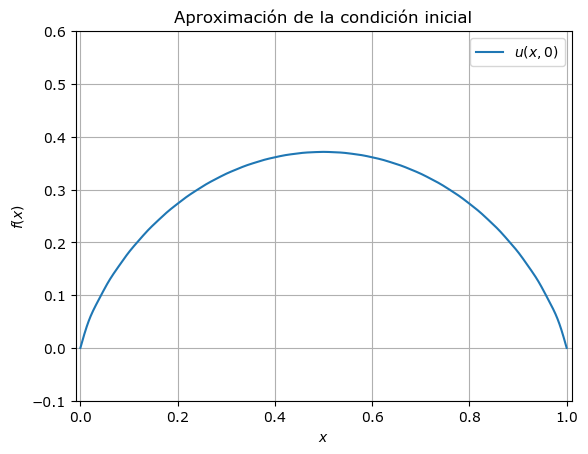

In [49]:
# Graficamos la solución para el tiempo inicial, t=0.
plot(x, U[:, 0], label='$u(x,0)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title("Aproximación de la condición inicial")
xlim([-0.01, 1.01])
ylim([-0.1, 0.6])
grid()
legend()
show()


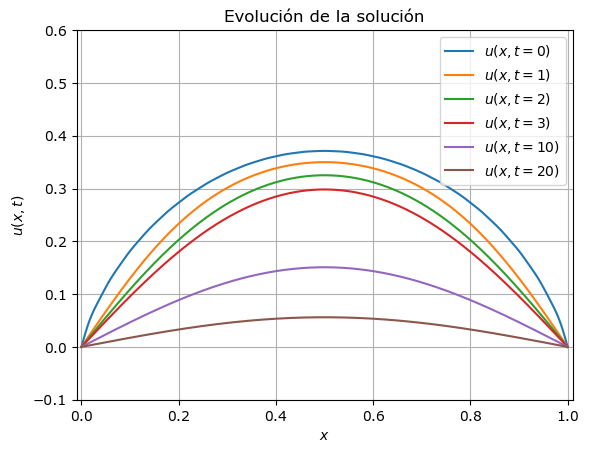

In [50]:
# Evolución de la solución para diferentes tiempos.
plot(x, U[:, 0], label='$u(x,t=0)$')
plot(x, U[:, 1], label='$u(x,t=1)$')
plot(x, U[:, 2], label='$u(x,t=2)$')
plot(x, U[:, 3], label='$u(x,t=3)$')
plot(x, U[:, 10], label='$u(x,t=10)$')
plot(x, U[:, 20], label='$u(x,t=20)$')
plt.xlabel('$x$')
plt.ylabel('$u(x,t)$')
plt.title("Evolución de la solución")
xlim([-0.01, 1.01])
ylim([-0.1, 0.6])
grid()
legend()
show()


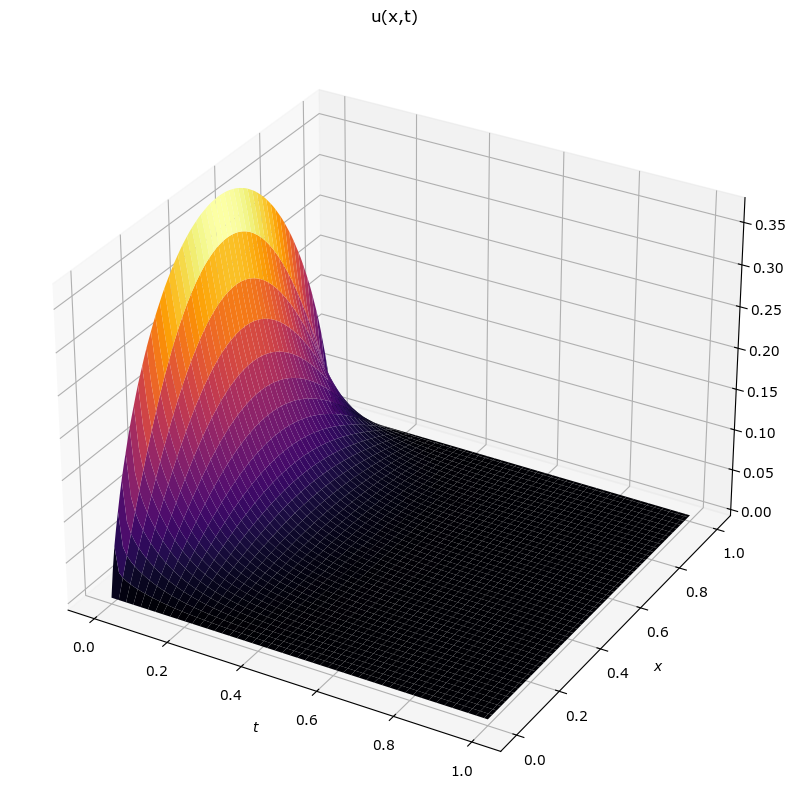

In [51]:
# Gráfica 3D de la evolución de la solución.
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0, 1.0, 100)
t = linspace(0, 1.0, 100)

X, T = np.meshgrid(x, t)
U = u_x_t(x, t)

plt.xlabel('$t$')
plt.ylabel('$x$')
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="inferno")